In [19]:
cd /content/drive/MyDrive/pytorch

/content/drive/MyDrive/pytorch


#### Tensor

In [1]:
import torch

In [2]:
x=torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [3]:
torch.tensor([[1,2,3],[4,5,6],[7,8,9]])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [4]:
print("Size:",x.size())
print("Shape:",x.shape)
print("랭크(차원):",x.ndimension())


Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


- unsqueeze(), squeeze(), view() 함수로 텐서의 랭크와 shape 변형


In [5]:
#unsqueeze():랭크 늘리기
x=torch.unsqueeze(x,0)
print(x)
print("Size:",x.size())
print("Shape:",x.shape)
print("랭크(차원):",x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [6]:
#squeeze(): 랭크 줄이기
x=torch.squeeze(x)
print(x)
print("Size:",x.size())
print("Shape:",x.shape)
print("랭크(차원):",x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [7]:
#view(): 텐서의 원소의 개수를 바꿀 수 없다.
x=x.view(9)
print(x)
print("Size:",x.size())
print("Shape:",x.shape)
print("랭크(차원):",x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [8]:
try:
  x=x.view(2,4)
except Exception as e:
  print(e)#에러 출력

shape '[2, 4]' is invalid for input of size 9


#### 텐서를 이용한 연산과 행렬곱
- torch.mm(): 행렬 곱

In [9]:
import torch

w=torch.randn(5,3,dtype=torch.float)
x=torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
print("w size:",w.size())
print("x size:",x.size())
print("w:",w)
print("x:",x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[-1.9206, -1.1797,  1.0169],
        [ 0.1498,  0.3092, -0.0477],
        [ 1.5806, -0.1943, -0.5825],
        [-0.1676,  1.4642, -0.7645],
        [ 0.9748, -1.5188, -0.5631]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [10]:
b=torch.randn(5,2,dtype=torch.float)
print("b size:",b.size())
print("b",b)

b size: torch.Size([5, 2])
b tensor([[ 0.6990, -0.6746],
        [-1.5031,  0.3079],
        [-2.1718,  1.7484],
        [-1.2235,  0.8370],
        [-0.4942, -1.3439]])


In [11]:
wx=torch.mm(w,x)
print("wx size:",wx.size())
print("wx:",wx)

wx size: torch.Size([5, 2])
wx: tensor([[-0.3752, -2.4586],
        [ 0.8389,  1.2503],
        [-1.9147, -1.1109],
        [ 0.4025,  0.9345],
        [-6.3969, -7.5039]])


In [12]:
result=wx+b
print("result size:",result.size())
print("result:",result)

result size: torch.Size([5, 2])
result: tensor([[ 0.3238, -3.1333],
        [-0.6641,  1.5582],
        [-4.0865,  0.6374],
        [-0.8210,  1.7715],
        [-6.8910, -8.8478]])


#### Autograd
- 경사 하강법(Gradient Descnet): 오차를 최소화하는데 가장 많이 쓰이는 알고리즘
- Autograd는 미분 계산을 자동화하여 직접 경사하강법을 구현해야하는 수고로움을 덜어준다.
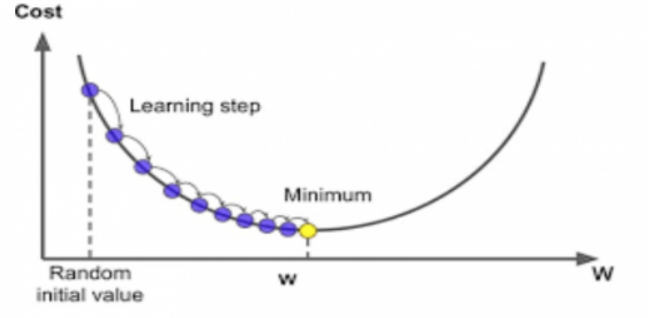

In [13]:
w=torch.tensor(1.0,requires_grad=True)
#requires_grad=True로 설정하면 w.grad에 w에대한 미분값을 자동 저장

In [14]:
a=w*3

In [15]:
l=a**2

In [16]:
l.backward()
print(f'l을 w로 미분한 값은 {w.grad}')

l을 w로 미분한 값은 18.0


#### 경사하강법으로 이미지 복원하기

In [17]:
import torch
import pickle
import matplotlib.pyplot as plt

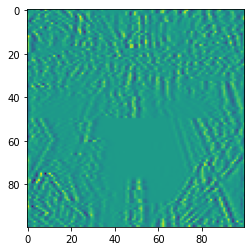

In [20]:
broken_image=torch.FloatTensor(pickle.load(open('./broken_image_t.p','rb'),encoding='latin1'))

plt.imshow(broken_image.view(100,100))

In [28]:
def weird_function(x,n_iter=5):
  h=x
  filt=torch.tensor([-1./3,1./3,-1./3])
  for i in range(n_iter):
    zero_tensor=torch.tensor([1.0*0])
    h_l=torch.cat((zero_tensor,h[:-1]),0)
    h_r=torch.cat((h[1:],zero_tensor),0)
    h=filt[0]*h+filt[2]*h_l+filt[1]*h_r
    if i%2==0:
      h=torch.cat((h[h.shape[0]//2:],h[:h.shape[0]//2]),0)
  return h

In [22]:
#torch.dist(): 두 텐서 사이의 거리를 구하는 함수
def distance_loss(hypothesis,broken_image):
  return torch.dist(hypothesis,broken_image)

In [38]:
# 100x100 모양의 행렬이 10000모양의 벡터로 표현된 텐서
random_tensor=torch.randn(10000,dtype=torch.float)

In [39]:
# 매개변수를 학습률(learning rate)
# Tip. 학습률이 너무 크면 오파함수의 최소점을 찾기 어려워진다. 반대로 학습률이 너무 작으면 학습 속도가 느려진다.
lr=0.8

In [41]:
# 경사하강법 구현
for i in range(0,20000):
  random_tensor.requires_grad_(True)
  hypothesis=weird_function(random_tensor)
  loss=distance_loss(hypothesis,broken_image)
  loss.backward()
  with torch.no_grad():
    random_tensor=random_tensor-lr*random_tensor.grad
  if i%10000==0:
    print(f"Loss at {i}={loss.item()}")

Loss at 0=0.02116801217198372
Loss at 10000=0.021170401945710182


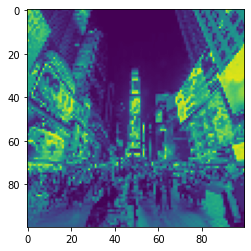

In [43]:
plt.imshow(random_tensor.view(100,100).data)

#### 신경망 모델 구현하기

In [60]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [61]:
#데이터셋 생성
n_dim=2
x_train,y_train=make_blobs(n_samples=80,n_features=n_dim,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],shuffle=True,cluster_std=0.3)
x_test,y_test=make_blobs(n_samples=20,n_features=n_dim,centers=[[1,1],[1,-1],[-1,-1],[-1,1]],shuffle=True,cluster_std=0.3)

In [62]:
# label_map 함수 구현
def label_map(y_,from_,to_):
  y=numpy.copy(y_)
  for f in from_:
    y[y_==f]=to_
  return y

# 0번, 1번레이블로 가진 데이터는 전부 0번 레이블을 갖도록 바꾸고 
#2번, 3번 레이블로 가진 데이터는 전부 1번 레이블을 갖도록 바꿔준다.
y_train=label_map(y_train,[0,1],0)
y_train=label_map(y_train,[2,3],1)
y_test=label_map(y_test,[0,1],0)
y_test=label_map(y_test,[2,3],1)

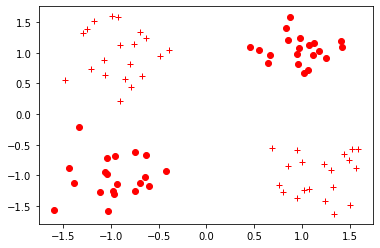

In [63]:
#레이블링이 잘 됐는지 확인(레이블이 0인지점은 o, 1인 지점은 +)
def vis_data(x,y=None,c='r'):
  if y is None:
    y=[None]*len(x)
  for x_,y_ in zip(x,y):
    if y_ is None:
      plt.plot(x_[0],x_[1],'*',markerfacecolor='none',makeredgecolor=c)
    else:
      plt.plot(x_[0],x_[1],c+'o' if y_==0 else c+'+')

plt.figure()
vis_data(x_train,y_train,c='r')
plt.show()

In [72]:
# 데이터셋을 파이토치 텐서로 변환
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)
x_test=torch.FloatTensor(x_test)
y_test=torch.FloatTensor(y_test)

In [76]:
# 신경망 모델 구현
class NeuralNet(torch.nn.Module):
  def __init__(self,input_size,hidden_size):
    super(NeuralNet,self).__init__()
    self.input_size=input_size
    self.hidden_size=hidden_size
    #인공신경망 통과
    self.linear_1=torch.nn.Linear(self.input_size,self.hidden_size)
    self.relu=torch.nn.ReLU()
    self.linear_2=torch.nn.Linear(self.hidden_size,1)
    self.sigmoid=torch.nn.Sigmoid()

  def forward(self,input_tensor):
    linear1=self.linear_1(input_tensor)
    relu=self.relu(linear1)
    linear2=self.linear_2(relu)
    output=self.sigmoid(linear2)
    return output

In [77]:
# 신경망 모델 생성
model=NeuralNet(2,5)
learning_rate=0.03
criterion=torch.nn.BCELoss()
epochs=2000
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [78]:
# 학습 전 모델 성능 평가
model.eval()
test_loss_before=criterion(model(x_test).squeeze(),y_test)
print(f'Before Training, test loss is {test_loss_before.item()}')

Before Training, test loss is 0.7614272832870483


In [80]:
#학습
for epoch in range(epochs):
  model.train()
  optimizer.zero_grad()
  train_output=model(x_train)
  train_loss=criterion(train_output.squeeze(),y_train)
  if epoch%100==0:
    print(f"Train Loss {epoch} is {train_loss.item()}")
  train_loss.backward()
  optimizer.step()

Train Loss 0 is 0.7227941155433655
Train Loss 100 is 0.6773552894592285
Train Loss 200 is 0.6270860433578491
Train Loss 300 is 0.5491214394569397
Train Loss 400 is 0.4668959677219391
Train Loss 500 is 0.39096248149871826
Train Loss 600 is 0.32278499007225037
Train Loss 700 is 0.2661511301994324
Train Loss 800 is 0.22121819853782654
Train Loss 900 is 0.18596911430358887
Train Loss 1000 is 0.15850800275802612
Train Loss 1100 is 0.13704481720924377
Train Loss 1200 is 0.12009310722351074
Train Loss 1300 is 0.10627515614032745
Train Loss 1400 is 0.09483975917100906
Train Loss 1500 is 0.08539717644453049
Train Loss 1600 is 0.07749028503894806
Train Loss 1700 is 0.07085005939006805
Train Loss 1800 is 0.06515685468912125
Train Loss 1900 is 0.06022336333990097


In [82]:
# 학습 후 모델 성능 평가
model.eval()
test_loss=criterion(model(x_test).squeeze(),y_test)
print(f'After Training, test loss is {test_loss.item()}')

After Training, test loss is 1.6857163906097412


In [83]:
# 학습된 가중치 저장
torch.save(model.state_dict(),'./model.pt')
print(f'state_dict format of the model: {model.state_dict()}')

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-1.6775,  1.5345],
        [-1.7618, -1.2384],
        [-0.3673,  0.3073],
        [ 0.8099,  2.0162],
        [-0.9681, -0.7154]])), ('linear_1.bias', tensor([-0.3139, -0.0841, -0.0420,  0.1429, -0.0864])), ('linear_2.weight', tensor([[ 2.1304, -2.0309,  0.3928, -1.9932, -1.0804]])), ('linear_2.bias', tensor([1.9787]))])


In [84]:
# 저장된 가중치를 불러와 새로운 모델에 적용(전이 학습)
new_model=NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1,1]이 레이블 1을 가질 확률 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1,1]이 레이블 1을 가질 확률 0.9904374480247498
